In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

In [15]:
# import the videos to read each frame 
cap = cv2.VideoCapture("DATA/test/c22/IMG_3751.MOV")

In [16]:
# total number of frames
num_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [2]:
# display image function
def show_pic(img_cross):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img_cross, cmap = "gray")


In [18]:
getting the frames from each video
def get_frames(num_frame):
    for frame in range(num_frame//2):
        ret, img = cap.read()
        # this rotates the image before writing to file
        rotated_img = cv2.rotate(img, cv2.ROTATE_180)        
        if ret == False:
            break
        else:
            path = r"DATA/test/c22"
            name = f'/b_c{frame + 1}.jpg' 
            # write the file
            cv2.imwrite(f'{path}{name}', rotated_img)
            

In [6]:
# this call will write the images to our training folder 
get_frames(num_frame=num_frame)
cap.release()

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode="nearest"                                
                                )

In [5]:
image_gen.flow_from_directory("DATA/train/")

Found 13308 images belonging to 22 classes.


In [7]:
# we'll use this shape for all the images 
input_shape = (550, 960, 3)

In [8]:
the_cow = cv2.imread('DATA/train/c1/a_c102.jpg')
the_cow = cv2.cvtColor(the_cow, cv2.COLOR_BGR2RGB)

In [9]:
the_cow.shape

(3840, 2160, 3)

In [10]:
resized = cv2.resize(the_cow, (550, 960), interpolation = cv2.INTER_AREA)

In [37]:
resized.shape

(960, 550, 3)

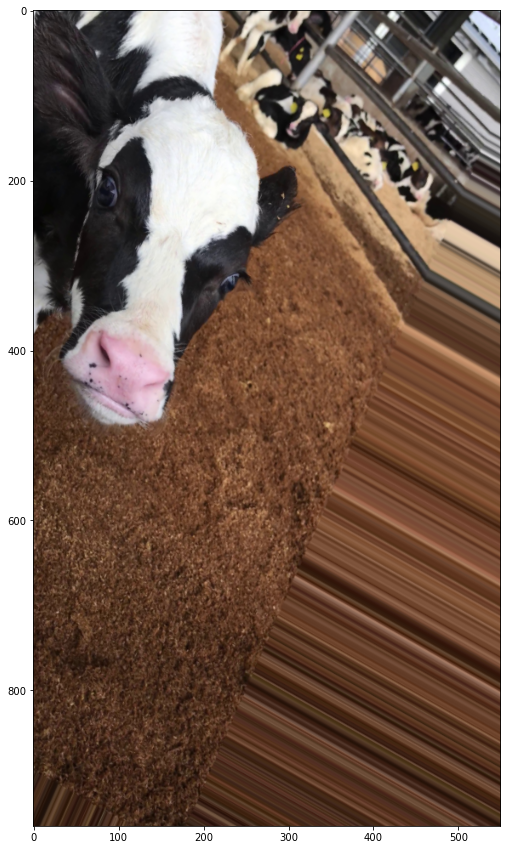

In [11]:
show_pic(image_gen.random_transform(resized))

In [12]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [13]:
model = Sequential()
# adding our convulutional nueral network layers 
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))

# the dropout layer reduces overfitting by randomly turning off nuerons during training 
model.add(Dropout(0.5))

# the output is binary, either cow1 or cow.. hence Dense layer is just one
model.add(Dense(1))
model.add(Activation("sigmoid"))
          
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"]
             )

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 548, 958, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 274, 479, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 272, 477, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 136, 238, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 134, 236, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 67, 118, 64)      0

In [15]:
batch_size = 16
# here we are just pointing the iterator to the path with the training data
train_img_gen = image_gen.flow_from_directory("DATA/train/",
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode="categorical")

Found 13308 images belonging to 22 classes.


In [16]:
# to see how the data classes will be presented 
train_img_gen.class_indices

{'c1': 0,
 'c10': 1,
 'c11': 2,
 'c12': 3,
 'c13': 4,
 'c14': 5,
 'c15': 6,
 'c16': 7,
 'c17': 8,
 'c18': 9,
 'c19': 10,
 'c2': 11,
 'c20': 12,
 'c21': 13,
 'c22': 14,
 'c3': 15,
 'c4': 16,
 'c5': 17,
 'c6': 18,
 'c7': 19,
 'c8': 20,
 'c9': 21}

In [17]:
test_img_gen = image_gen.flow_from_directory("DATA/test/",
                                             target_size=input_shape[:2],
                                             batch_size=batch_size,
                                             class_mode="categorical")

Found 3269 images belonging to 22 classes.


In [18]:
# training the model on our images 
results = model.fit(train_img_gen, epochs=5, steps_per_epoch=150,
                             validation_data=test_img_gen, validation_steps=12)

Epoch 1/5
150/150 [==============================] - 1107s 7s/step - loss: 0.2830 - accuracy: 0.9409 - val_loss: 0.1895 - val_accuracy: 0.9545
Epoch 2/5
150/150 [==============================] - 1249s 8s/step - loss: 0.1934 - accuracy: 0.9545 - val_loss: 0.1854 - val_accuracy: 0.9545
Epoch 3/5
150/150 [==============================] - 1189s 8s/step - loss: 0.1926 - accuracy: 0.9545 - val_loss: 0.1864 - val_accuracy: 0.9545
Epoch 4/5
150/150 [==============================] - 1121s 7s/step - loss: 0.1921 - accuracy: 0.9545 - val_loss: 0.1888 - val_accuracy: 0.9545
Epoch 5/5
150/150 [==============================] - 1079s 7s/step - loss: 0.1917 - accuracy: 0.9545 - val_loss: 0.1858 - val_accuracy: 0.9545


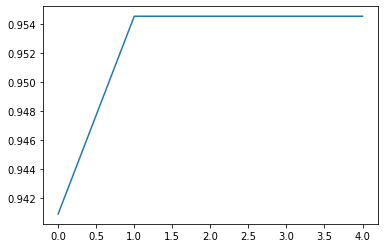

In [28]:
# saving the model 
#model.save("Cow_model.h5")
# now we evaluate the model 
plt.plot(results.history["accuracy"])

In [74]:
import tensorflow.compat.v2 as tf
from keras.preprocessing import image

# the_cow_1 = cv2.imread('DATA/train/c1/a_c102.jpg')

# the_cow_1 = image.load_img(the_cow_1, target_size=(960, 550))

# the_cow_1 = image.img_to_array(the_cow_1)

# the_cow_1 = np.expand_dims(the_cow_1, axis=0)
# the_cow_1 = the_cow_1/255

the_cow_1 = tf.keras.utils.load_img('DATA/test/fake/false3.jpg', target_size=(550, 960))
input_arr = tf.keras.utils.img_to_array(the_cow_1)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = input_arr/255


In [62]:
train_img_gen.class_indices

{'c1': 0,
 'c10': 1,
 'c11': 2,
 'c12': 3,
 'c13': 4,
 'c14': 5,
 'c15': 6,
 'c16': 7,
 'c17': 8,
 'c18': 9,
 'c19': 10,
 'c2': 11,
 'c20': 12,
 'c21': 13,
 'c22': 14,
 'c3': 15,
 'c4': 16,
 'c5': 17,
 'c6': 18,
 'c7': 19,
 'c8': 20,
 'c9': 21}

In [75]:
#prediction_prob = model.predict(the_cow_1)
#predictions = model.predict_classes(input_arr)

predicted = np.argmax(model.predict(input_arr),axis=1)

1/1 [==============================] - 0s 171ms/step


In [76]:
print(predicted)

[0]
